# Decision Tree

Last edited: 4/14/2020 3pm

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter("ignore")
import time

%matplotlib inline

In [2]:
#Load cleaned data set 
from utils import intake_data
data = intake_data()
#adjust variables
data.rename(columns = {'death = 1 ': 'death'}, inplace=True)
#create X and Y dataframes
data_X = data.iloc[:, :16]
data_Y = data.iloc[:, 17] #df with class labels
print(data_Y.head())
data_X.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: death, dtype: float64


,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,PaO2/FiO2,LDH,CT score,PEEP,PIP,TV,DARDS = 1
0,79.0,0,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,108.0,339.0,191.6,24.0,25.948052,428.05036,0.0
1,83.0,0,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,78.0,385.0,213.3,5.0,10.000000,360.00000,0.0
2,70.0,0,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,70.9,461.0,221.7,18.0,24.000000,525.00000,0.0
3,61.0,0,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,59.2,227.0,211.6,10.0,24.000000,480.00000,0.0
4,81.0,0,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,83.6,680.0,234.9,5.0,10.000000,625.00000,0.0


In [8]:
# run a nested cross-validation 
dt = DecisionTreeClassifier(criterion = "entropy")
params = {"max_depth":[2,4,6,8,10,12], "max_features":[2,4,6,8,10,12,14], 
          "min_samples_leaf":[2,4,6,8,10,12,14,16,18,20]} 
clf = sk.model_selection.GridSearchCV(dt, param_grid = params, scoring = "accuracy", cv = 10)
accuracies = sk.model_selection.cross_val_score(clf, data_X, data_Y, cv = 10)

In [9]:
# print results 

print(accuracies.mean())
# criterion = "gini" : 0.628
# criterion = "entropy" : 0.612

# how to get best params out of classifier??
#print(clf.best_params_)

0.6121052631578948


Training Set Records: 177
Testing Set Records: 20


[Text(125.55000000000001, 203.85, 'X[2] <= 1.95\ngini = 0.455\nsamples = 197\nvalue = [128, 69]'),
 Text(105.85588235294118, 176.67000000000002, 'gini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(145.24411764705883, 176.67000000000002, 'X[10] <= 280.5\ngini = 0.43\nsamples = 179\nvalue = [123, 56]'),
 Text(59.082352941176474, 149.49, 'X[11] <= 210.75\ngini = 0.296\nsamples = 61\nvalue = [50, 11]'),
 Text(39.38823529411765, 122.31, 'X[5] <= 22.4\ngini = 0.087\nsamples = 44\nvalue = [42, 2]'),
 Text(19.694117647058825, 95.13, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(59.082352941176474, 95.13, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(78.7764705882353, 122.31, 'gini = 0.498\nsamples = 17\nvalue = [8, 9]'),
 Text(231.40588235294118, 149.49, 'X[15] <= 0.5\ngini = 0.472\nsamples = 118\nvalue = [73, 45]'),
 Text(167.4, 122.31, 'X[11] <= 234.8\ngini = 0.491\nsamples = 97\nvalue = [55, 42]'),
 Text(98.47058823529412, 95.13, 'X[4] <= 5500.0\ngini = 0.426\nsamples = 52\nv

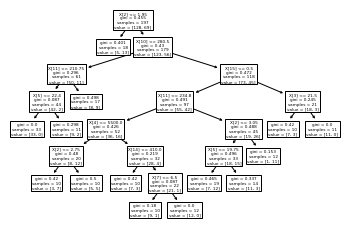

In [12]:
# Run model: do you use a testing set or just use it all because you know the accuracy??

# option 1: split into test and train
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = .1)
print("Training Set Records:", len(x_train))
print("Testing Set Records:", len(x_test))


# option 2 = run it on all data
clf = DecisionTreeClassifier(criterion = "gini", 
                            max_depth = 10, 
                            max_features = 10, 
                            min_samples_leaf = 10)
tree.plot_tree(clf.fit(data_X, data_Y))